# 1960年〜のインフレ率・FFレート・10年債利回りの推移を2013年〜と比較

インフレ率：https://fred.stlouisfed.org/series/CPIAUCSL
FFレート：https://fred.stlouisfed.org/series/FF
10年債利回り：https://fred.stlouisfed.org/series/DGS10

In [1]:
import yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
c20_start_date = '1965-09-01'
c20_end_date = '1989-12-31'
c21_start_date = '2013-05-01'

In [3]:
# FRED FFデータ
data=pd.read_csv('data/FF.csv', sep=',',index_col='DATE',parse_dates=True)
data = data.resample('M').first()

# データを切り出す
data_ff_c20 = data[c20_start_date:c20_end_date]
data_ff_c21 = data[c21_start_date:]

data_range_ff_c20 = range(len(data_ff_c20))
data_range_ff_c21 = range(len(data_ff_c21))

In [4]:
# FRED CPIデータ
data=pd.read_csv('data/CPIAUCSL.csv', sep=',',index_col='DATE',parse_dates=True)
data = data.resample('M').first()

# データを切り出す
data_cpi_c20 = data[c20_start_date:c20_end_date]
data_cpi_c21 = data[c21_start_date:]

data_range_cpi_c20 = range(len(data_cpi_c20))
data_range_cpi_c21 = range(len(data_cpi_c21))

In [5]:
# FRED US10Y(10年債利回り)データ
data=pd.read_csv('data/DGS10.csv', sep=',',index_col='DATE',parse_dates=True)
data = data.resample('M').first()

# データを切り出す
data_us10y_c20 = data[c20_start_date:c20_end_date]
data_us10y_c21 = data[c21_start_date:]

data_range_us10y_c20 = range(len(data_us10y_c20))
data_range_us10y_c21 = range(len(data_us10y_c21))

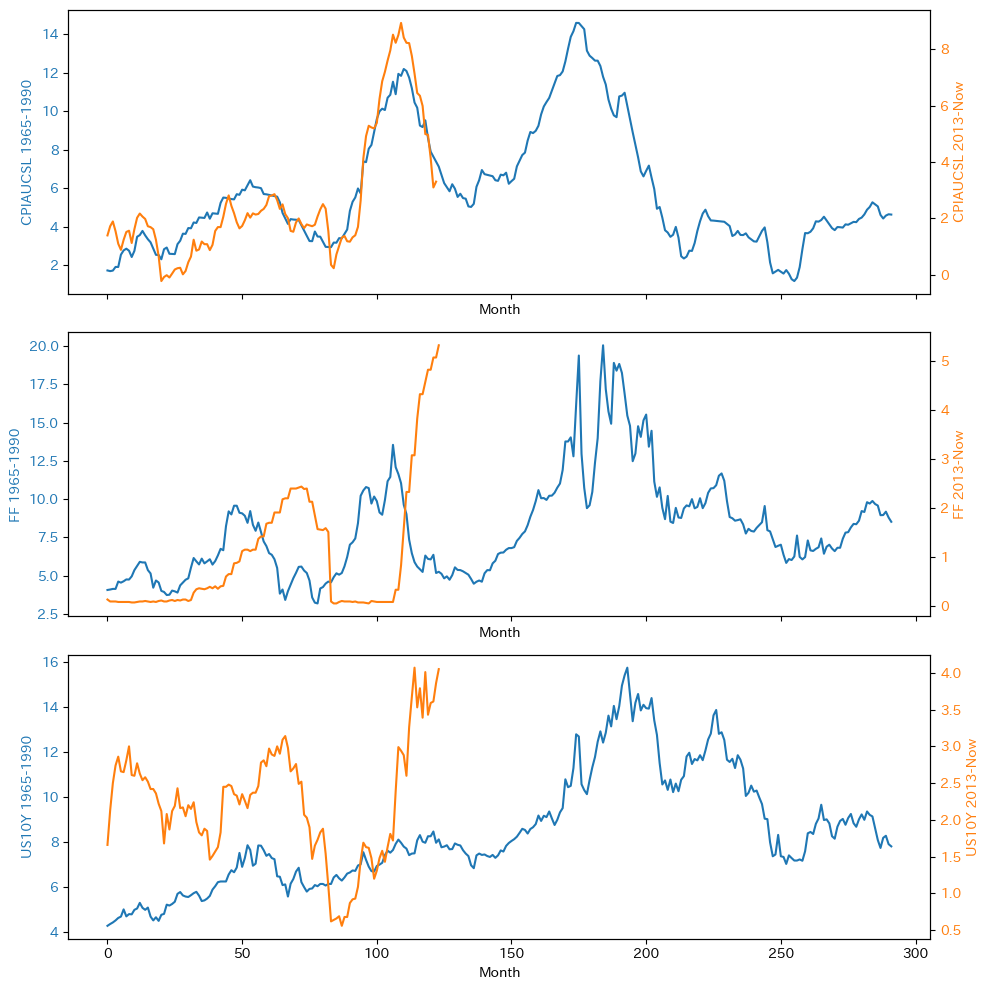

In [7]:
# グラフを描画
fig, (ax1, ax3, ax5) = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# 1965年からのCPIをプロット（左側のY軸）
ax1.plot(data_range_cpi_c20, data_cpi_c20['CPIAUCSL_PC1'], label='1965-1990', color='tab:blue')
ax1.set_xlabel('Month')
ax1.set_ylabel('CPIAUCSL 1965-1990', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 右側のY軸を作成
ax2 = ax1.twinx()

# 2013年からのCPIをプロット（右側のY軸）
ax2.plot(data_range_cpi_c21, data_cpi_c21['CPIAUCSL_PC1'], label='2013-', color='tab:orange')
ax2.set_ylabel('CPIAUCSL 2013-Now', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# CPIのグラフの下に、1965年からのFFをプロット（左側のY軸）
ax3.plot(data_range_ff_c20, data_ff_c20['FF'], label='1965-1990', color='tab:blue')
ax3.set_xlabel('Month')
ax3.set_ylabel('FF 1965-1990', color='tab:blue')
ax3.tick_params(axis='y', labelcolor='tab:blue')

# 右側のY軸を作成
ax4 = ax3.twinx()

# 2013年からのFFをプロット（右側のY軸）
ax4.plot(data_range_ff_c21, data_ff_c21['FF'], label='2013-', color='tab:orange')
ax4.set_ylabel('FF 2013-Now', color='tab:orange')
ax4.tick_params(axis='y', labelcolor='tab:orange')

# FFのグラフの下に、1965年からのUS10Yをプロット（左側のY軸）
ax5.plot(data_range_us10y_c20, data_us10y_c20['DGS10'], label='1965-1990', color='tab:blue')
ax5.set_xlabel('Month')
ax5.set_ylabel('US10Y 1965-1990', color='tab:blue')
ax5.tick_params(axis='y', labelcolor='tab:blue')

# 右側のY軸を作成
ax6 = ax5.twinx()

# 2013年からのUS10Yをプロット（右側のY軸）
ax6.plot(data_range_us10y_c21, data_us10y_c21['DGS10'], label='2013-', color='tab:orange')
ax6.set_ylabel('US10Y 2013-Now', color='tab:orange')
ax6.tick_params(axis='y', labelcolor='tab:orange')

# グラフを表示
plt.tight_layout()
plt.show()